In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_reward(dirname):
    reward = []
    with open(dirname+'/Simple.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            reward.append(float(row['Environment/Cumulative Reward']))
    return reward

In [3]:
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [8]:
seeds = [0,1,2,3,4]
obs_types = ["long", "longpre"]

In [9]:
rewards_ppo = {} 
for obs in obs_types:
    rewards_ppo[obs] = []
    for s in seeds:
        rewards_ppo[obs].append(read_reward("transfer_results/ppo_{}_s{}".format(obs, s)))
    rewards_ppo[obs] = np.array(rewards_ppo[obs])

In [16]:
rewards_model = {} 
for obs in obs_types:
    rewards_model[obs] = []
    for s in seeds:
        rewards_model[obs].append(read_reward("transfer_results/model_{}_s{}".format(obs, s)))
    rewards_model[obs] = np.array(rewards_model[obs])

In [18]:
rewards_transfer = {} 
for obs in obs_types:
    rewards_transfer[obs] = []
    for s in seeds:
        rewards_transfer[obs].append(read_reward("transfer_results/normal_transfer_to_{}_s{}".format(obs, s)))
    rewards_transfer[obs] = np.array(rewards_transfer[obs])

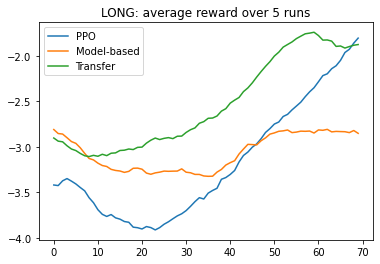

In [28]:
xs = list(range(len(rewards_ppo["long"][0])))
plt.plot(xs, smooth(np.mean(rewards_ppo["long"], axis=0), 0.9), label="PPO")
plt.plot(xs, smooth(np.mean(rewards_model["long"], axis=0), 0.9), label="Model-based")
plt.plot(xs, smooth(np.mean(rewards_transfer["long"], axis=0), 0.9), label="Transfer")
plt.legend()
plt.title("LONG: average reward over 5 runs")
plt.show()

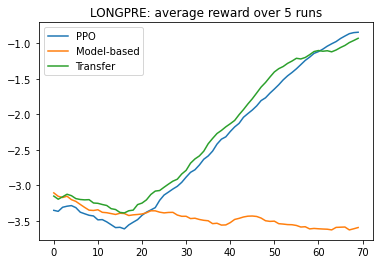

In [29]:
xs = list(range(len(rewards_ppo["longpre"][0])))
plt.plot(xs, smooth(np.mean(rewards_ppo["longpre"], axis=0), 0.9), label="PPO")
plt.plot(xs, smooth(np.mean(rewards_model["longpre"], axis=0), 0.9), label="Model-based")
plt.plot(xs, smooth(np.mean(rewards_transfer["longpre"], axis=0), 0.9), label="Transfer")
plt.legend()
plt.title("LONGPRE: average reward over 5 runs")
plt.show()

In [40]:
seeds = [0,1,2,3,4]
obs_types = ["long", "longpre"]
rewards_ppo = {} 
for obs in obs_types:
    rewards_ppo[obs] = []
    for s in seeds:
        rewards_ppo[obs].append(read_reward("transfer_results/ppo_{}_s{}".format(obs, s)))
    rewards_ppo[obs] = np.array(rewards_ppo[obs])
rewards_model = {} 
for obs in obs_types:
    rewards_model[obs] = []
    for s in seeds:
        rewards_model[obs].append(read_reward("transfer_results/model_{}_s{}".format(obs, s)))
    rewards_model[obs] = np.array(rewards_model[obs])
rewards_transfer = {} 
for obs in obs_types:
    rewards_transfer[obs] = []
    for s in seeds:
        rewards_transfer[obs].append(read_reward("transfer_results/normal_transfer_to_{}_s{}".format(obs, s)))
    rewards_transfer[obs] = np.array(rewards_transfer[obs])
rewards_transfer_linear = {} 
for obs in obs_types:
    rewards_transfer_linear[obs] = []
    for s in seeds:
        rewards_transfer_linear[obs].append(read_reward("transfer_results/normal_transfer_linear_to_{}_s{}".format(obs, s)))
    rewards_transfer_linear[obs] = np.array(rewards_transfer_linear[obs])
rewards_transfer_fix = {} 
for obs in obs_types:
    rewards_transfer_fix[obs] = []
    for s in seeds:
        rewards_transfer_fix[obs].append(read_reward("transfer_results/normal_transfer_linear_fix_to_{}_s{}".format(obs, s)))
    rewards_transfer_fix[obs] = np.array(rewards_transfer_fix[obs])

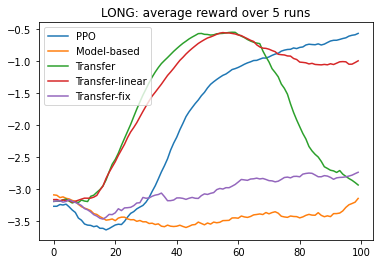

In [41]:
# constant policy lr, retrain model and action encoder 
xs = list(range(len(rewards_ppo["long"][0])))
plt.plot(xs, smooth(np.mean(rewards_ppo["long"], axis=0), 0.9), label="PPO")
plt.plot(xs, smooth(np.mean(rewards_model["long"], axis=0), 0.9), label="Model-based")
plt.plot(xs, smooth(np.mean(rewards_transfer["long"], axis=0), 0.9), label="Transfer")
plt.plot(xs, smooth(np.mean(rewards_transfer_linear["long"], axis=0), 0.9), label="Transfer-linear")
plt.plot(xs, smooth(np.mean(rewards_transfer_fix["long"], axis=0), 0.9), label="Transfer-fix")
plt.legend()
plt.title("LONG: average reward over 5 runs")
plt.show()

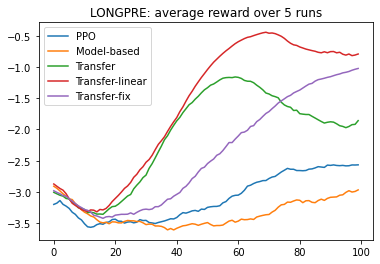

In [42]:
xs = list(range(len(rewards_ppo["longpre"][0])))
plt.plot(xs, smooth(np.mean(rewards_ppo["longpre"], axis=0), 0.9), label="PPO")
plt.plot(xs, smooth(np.mean(rewards_model["longpre"], axis=0), 0.9), label="Model-based")
plt.plot(xs, smooth(np.mean(rewards_transfer["longpre"], axis=0), 0.9), label="Transfer")
plt.plot(xs, smooth(np.mean(rewards_transfer_linear["longpre"], axis=0), 0.9), label="Transfer-linear")
plt.plot(xs, smooth(np.mean(rewards_transfer_fix["longpre"], axis=0), 0.9), label="Transfer-fix")
plt.legend()
plt.title("LONGPRE: average reward over 5 runs")
plt.show()

In [43]:
rewards_ppo = {} 
obs_types = ["long-n", "longpre-n"]
for obs in obs_types:
    rewards_ppo[obs] = []
    for s in seeds:
        rewards_ppo[obs].append(read_reward("transfer_results/ppo_{}_s{}".format(obs, s)))
    rewards_ppo[obs] = np.array(rewards_ppo[obs])
rewards_model = {} 
for obs in obs_types:
    rewards_model[obs] = []
    for s in seeds:
        rewards_model[obs].append(read_reward("transfer_results/model_{}_s{}".format(obs, s)))
    rewards_model[obs] = np.array(rewards_model[obs])
rewards_transfer = {} 
for obs in obs_types:
    rewards_transfer[obs] = []
    for s in seeds:
        rewards_transfer[obs].append(read_reward("transfer_results/normal_transfer_to_{}_s{}".format(obs, s)))
    rewards_transfer[obs] = np.array(rewards_transfer[obs])

In [47]:
rewards_transfer_trainaction = {} 
for obs in obs_types:
    rewards_transfer_trainaction[obs] = []
    for s in seeds:
        rewards_transfer_trainaction[obs].append(read_reward("transfer_results/normal_transfer_train-action_to_{}_s{}".format(obs, s)))
    rewards_transfer_trainaction[obs] = np.array(rewards_transfer_trainaction[obs])

In [49]:
rewards_transfer_trainall = {} 
for obs in obs_types:
    rewards_transfer_trainall[obs] = []
    for s in seeds:
        rewards_transfer_trainall[obs].append(read_reward("transfer_results/normal_transfer_train-all-stopgrad_to_{}_s{}".format(obs, s)))
    rewards_transfer_trainall[obs] = np.array(rewards_transfer_trainall[obs])

In [51]:
rewards_model_bisim = {} 
for obs in obs_types:
    rewards_model_bisim[obs] = []
    for s in [0,1]:
        rewards_model_bisim[obs].append(read_reward("transfer_results/model_bisim_{}_s{}".format(obs, s)))
    rewards_model_bisim[obs] = np.array(rewards_model_bisim[obs])

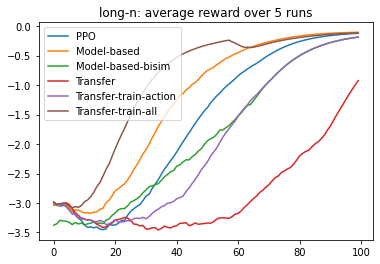

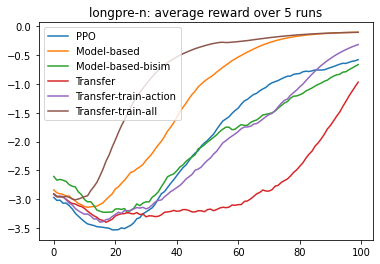

In [52]:
for obs in obs_types:
    xs = list(range(len(rewards_ppo[obs][0])))
    plt.plot(xs, smooth(np.mean(rewards_ppo[obs], axis=0), 0.9), label="PPO")
    plt.plot(xs, smooth(np.mean(rewards_model[obs], axis=0), 0.9), label="Model-based")
    plt.plot(xs, smooth(np.mean(rewards_model_bisim[obs], axis=0), 0.9), label="Model-based-bisim")
    plt.plot(xs, smooth(np.mean(rewards_transfer[obs], axis=0), 0.9), label="Transfer")
    plt.plot(xs, smooth(np.mean(rewards_transfer_trainaction[obs], axis=0), 0.9), label="Transfer-train-action")
    plt.plot(xs, smooth(np.mean(rewards_transfer_trainall[obs], axis=0), 0.9), label="Transfer-train-all")
    plt.legend()
    plt.title(obs+": average reward over 5 runs")
    plt.show()